# IMPORT LIBRARIES 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## LOAD DATASET 

In [41]:
df = pd.read_csv("Store_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (kR),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## DATA PREPROCESSING 

In [42]:
df.describe()

,CustomerID,Age,Annual Income (kR),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (kR)', ylabel='Density'>

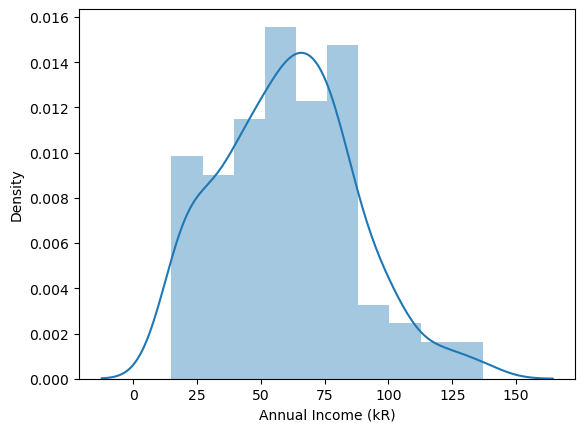

In [43]:
sns.distplot(df['Annual Income (kR)'])

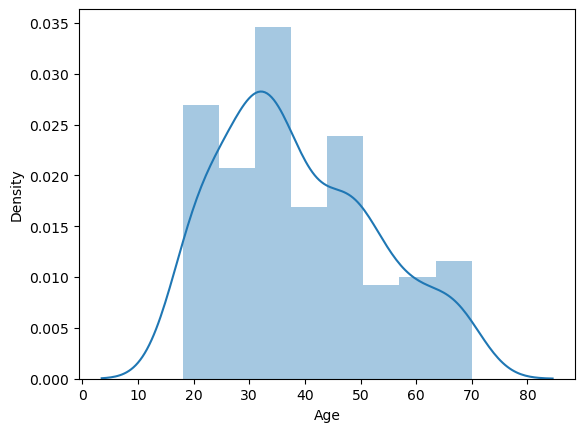

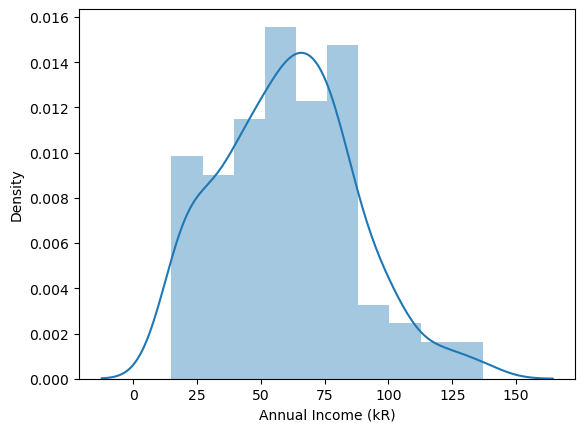

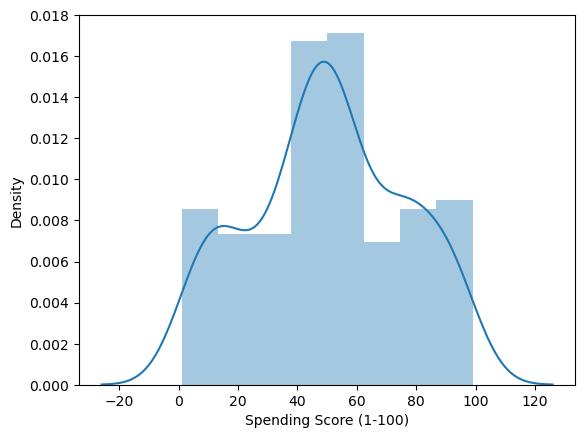

In [44]:
columns = ['Age', 'Annual Income (kR)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

In [45]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (kR)',
       'Spending Score (1-100)'],
      dtype='object')

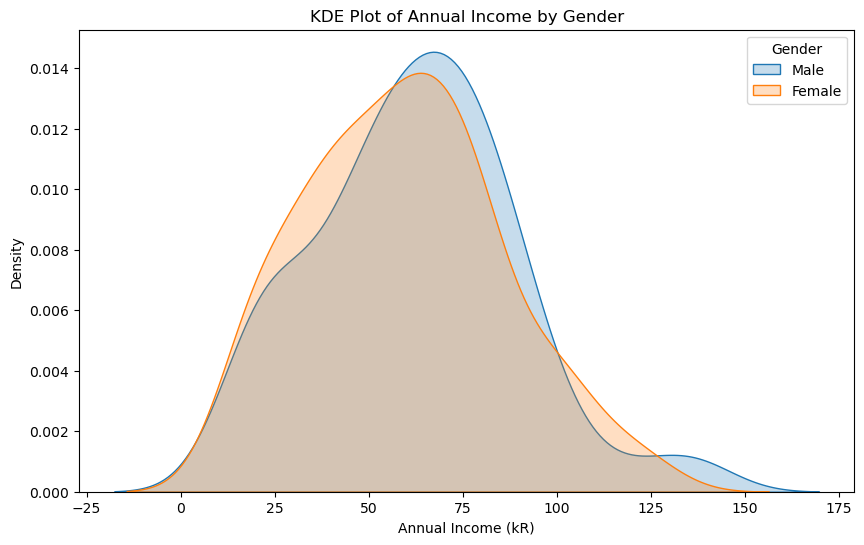

In [46]:
plt.figure(figsize=(10, 6))

# Create KDE plots for each gender
for gender in df['Gender'].unique():
    sns.kdeplot(data=df[df['Gender'] == gender], x='Annual Income (kR)', label=gender, shade=True)

plt.title('KDE Plot of Annual Income by Gender')
plt.xlabel('Annual Income (kR)')
plt.ylabel('Density')
plt.legend(title='Gender')

plt.show()

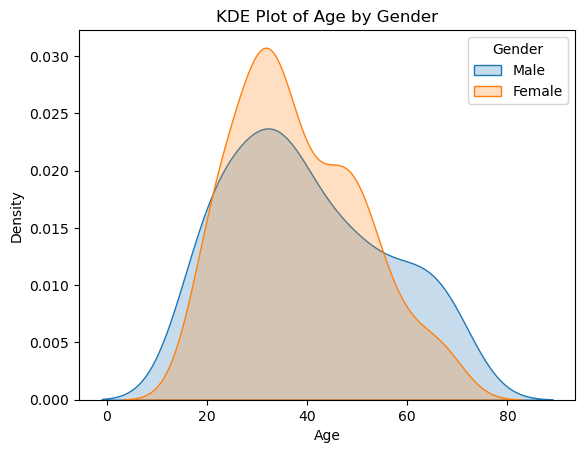

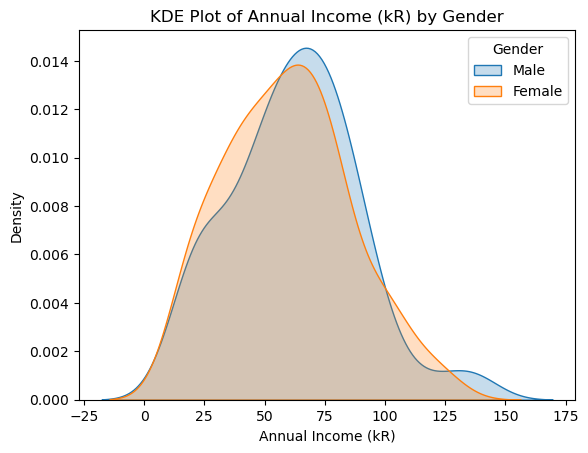

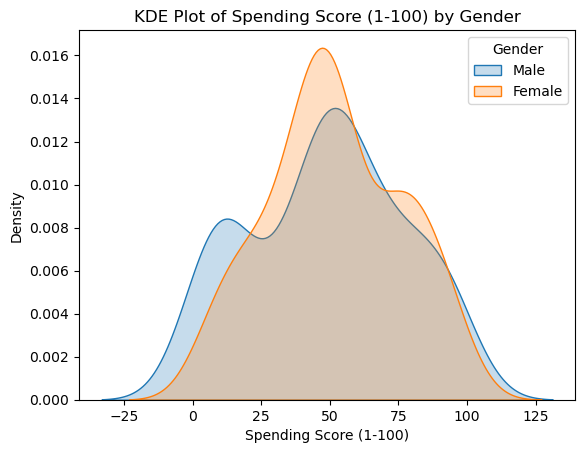

In [47]:
columns = ['Age', 'Annual Income (kR)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    for gender in df['Gender'].unique():
        sns.kdeplot(data=df[df['Gender'] == gender], x=i, label=gender, shade=True)
    plt.title(f'KDE Plot of {i} by Gender')
    plt.legend(title='Gender')
    plt.show()

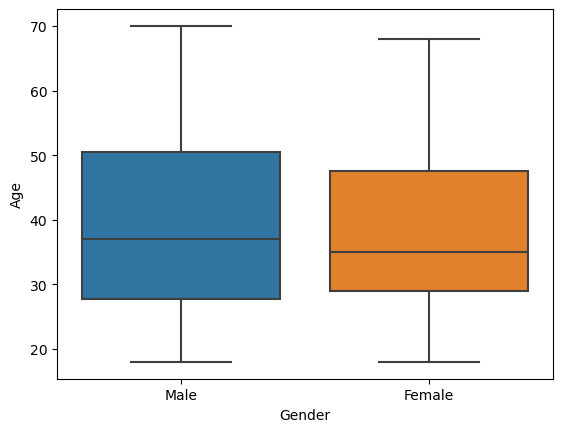

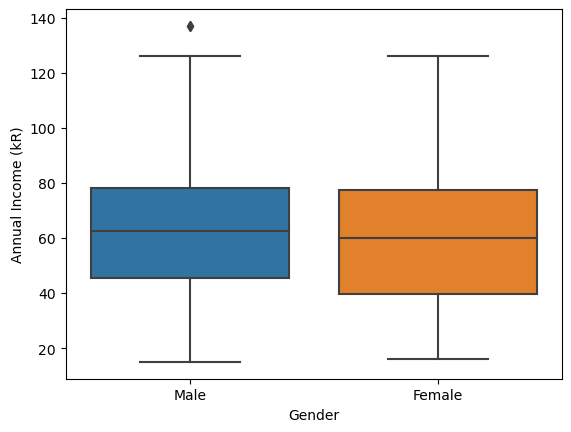

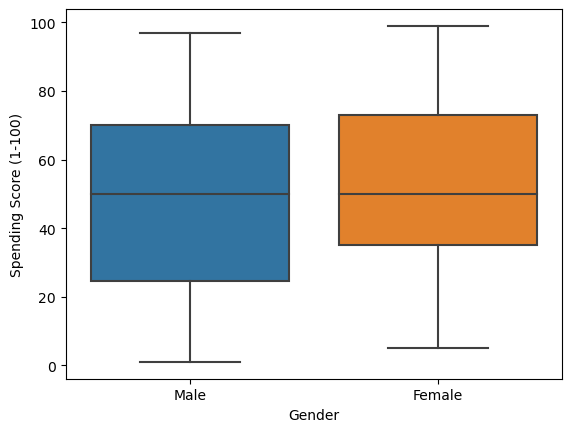

In [48]:
columns = ['Age', 'Annual Income (kR)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [15]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

<Axes: xlabel='Annual Income (kR)', ylabel='Spending Score (1-100)'>

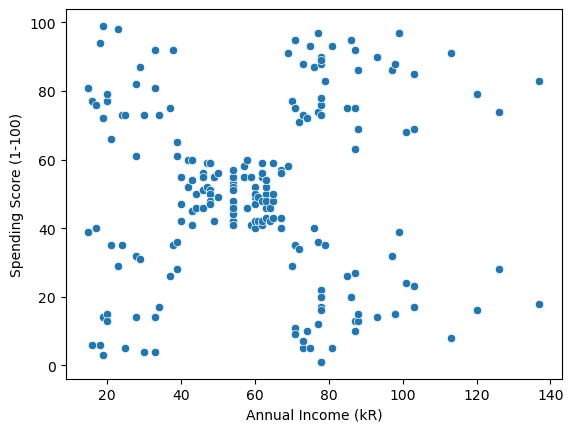

In [49]:
sns.scatterplot(data=df, x='Annual Income (kR)',y='Spending Score (1-100)' )

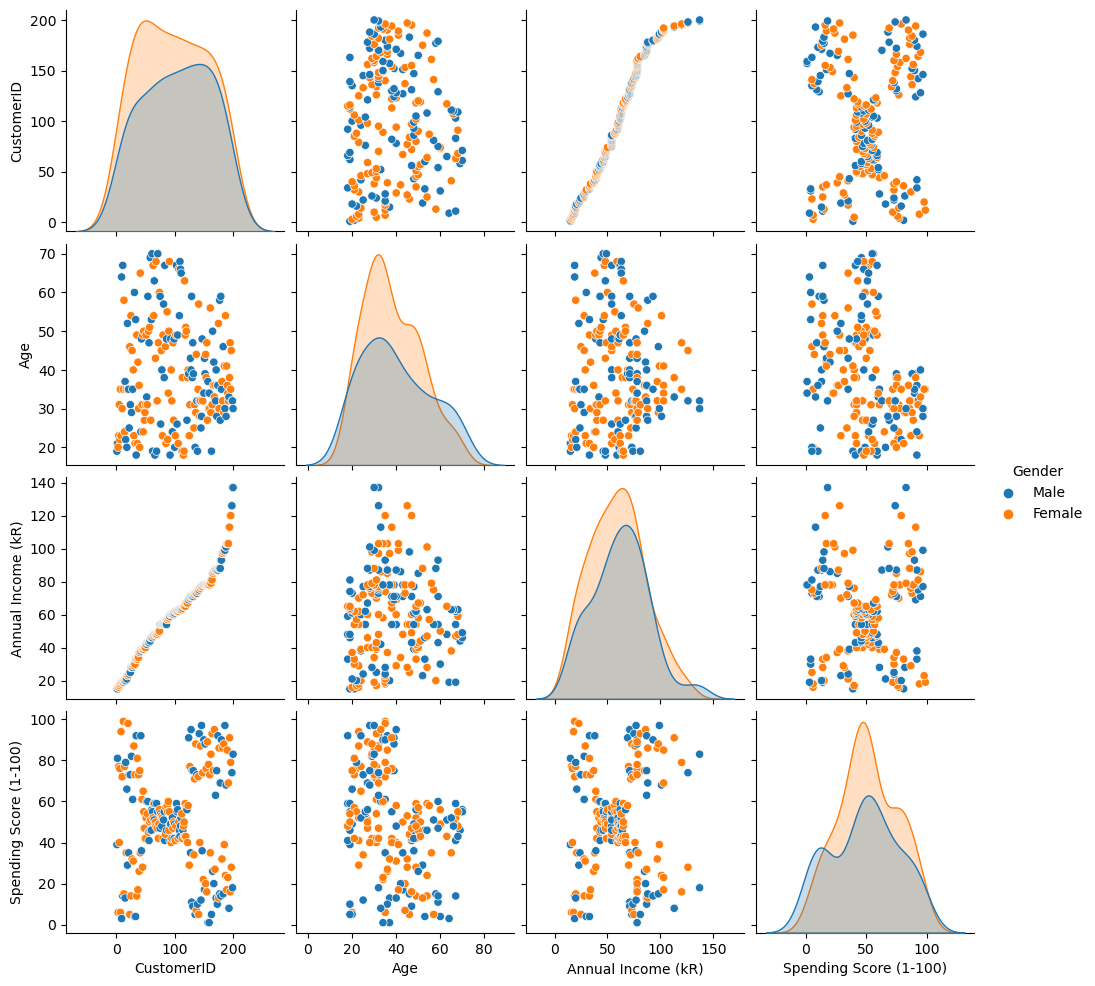

In [50]:
sns.pairplot(df,hue='Gender')

In [51]:
df.groupby(['Gender'])['Age', 'Annual Income (kR)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (kR),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [52]:
df.corr()

,CustomerID,Age,Annual Income (kR),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (kR),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

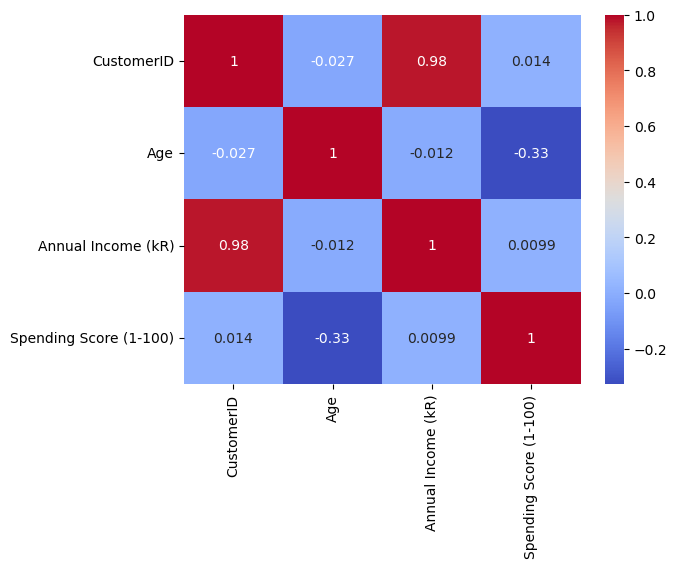

In [53]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## MODEL SELECTION & TRAINING 

In [54]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (kR)']])

KMeans(n_clusters=3)

In [55]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [56]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (kR),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [57]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [58]:
clustering1.inertia_

23517.330930930933

In [59]:
23517.33093093092
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (kR)']])
    intertia_scores.append(kmeans.inertia_)

In [60]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3976.358363858364,
 2831.296031746032,
 2168.4787157287155,
 1767.6406204906204]

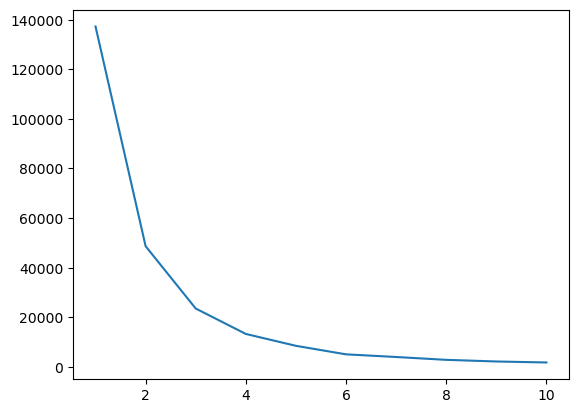

In [61]:
plt.plot(range(1,11),intertia_scores)

In [62]:
df.columns

df.groupby('Income Cluster')['Age', 'Annual Income (kR)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (kR),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [63]:
#Bivariate Clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (kR)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (kR),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,1


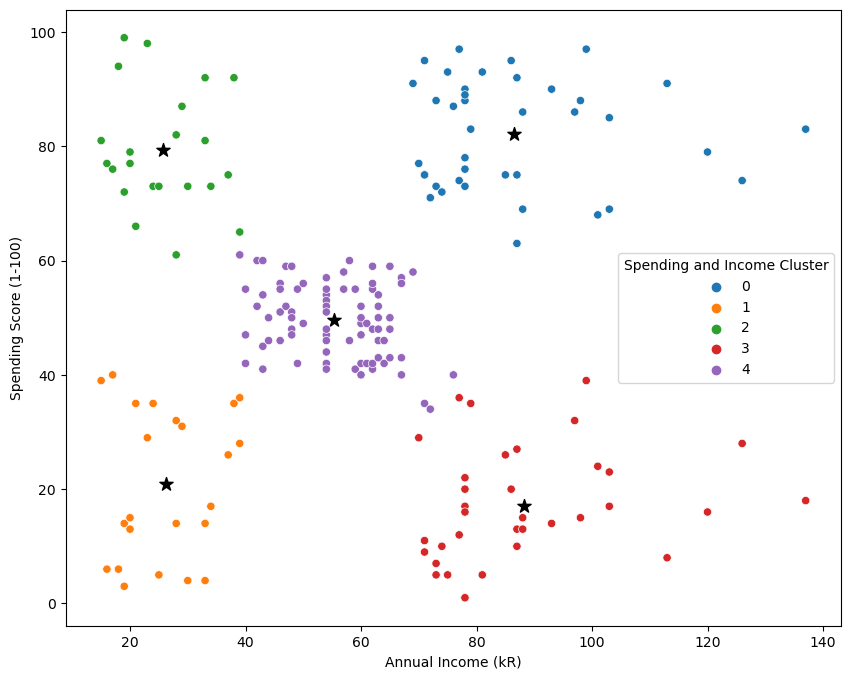

In [64]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (kR)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [65]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.590909,0.409091
3,0.457143,0.542857
4,0.592593,0.407407


In [69]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (kR)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (kR),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,42.716049,55.296296,49.518519


In [70]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df.head()

,CustomerID,Gender,Age,Annual Income (kR),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,1


In [71]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (kR),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,1,1
1,2,21,15,81,0,2,1
2,3,20,16,6,0,1,0
3,4,23,16,77,0,2,0
4,5,31,17,40,0,1,0


In [72]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (kR)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [73]:
dff = dff[['Age', 'Annual Income (kR)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (kR),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [74]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


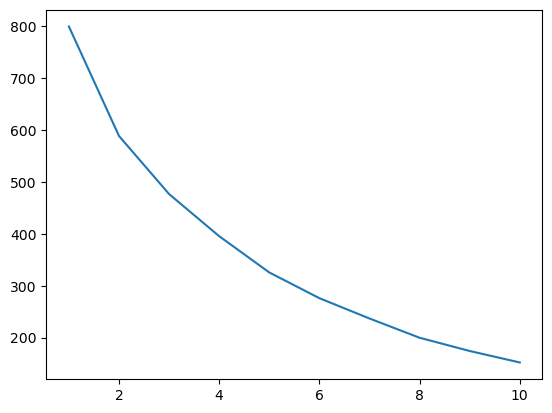

In [75]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)